# Exercise 3 Quantitative Measures from ERP signals 

### Exercises 3 and 4 completes our discussion of extracting features from EEG experiments for building relationships with data. 

#### Exercise 3 is focused on extracting ERP measures (peak amplitude and latency) from ERP averages.  

### We will come back to these EEG measurements when we learn about classifiers.

## Face Perception Experiment 

### These data were extracted from the ERP CORE (https://osf.io/thsqg/wiki/home/).  

### These are data from the experiment, **N170 Face Perception Experiment**

### Some details of the experiment - 
*   The stimulus consists of four types of stimuli - Faces. Cars. Scrambled Faces, Scrambled Cars
*   On any trial one of these stimuli are presented (with probability 0.25)
*   On each trial, an image of a face, car, scrambled face, or scrambled car was presented in the center of the screen, and participants indicated whether a given stimulus was an “object” (face or car) or a “texture” (scrambled face or scrambled car)

## THIS IS ONE OF THE STIMULUS SETS FOR THE CLASS FINAL PROJECT.  IN THE FINAL PROJECT, THE TASK WILL BE TO CHARACTERIZE THE DIFFERENCES BETWEEN THE 4 STIMULUS CLASSES AND DEVELOP A CLASSIFIER MODEL TO PREDICT WHICH STIMULUS WAS PRESENTED ON EACH TRIAL. 


In [96]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 
from scipy.fftpack import fft
from scipy import signal  #THIS IS NEW!!!

#### There are 3 data files available for your inspection, 1_N170.mat, 2_N170.mat, 3_N170.mat 
#### The 3 files have the same experiment in different participants.  

In [97]:
data = loadmat('data/2_N170.mat')


In [98]:
channelnames = data['channelnames']
eeg = data['eeg']
eeg_time = data['eeg_time']
goodtrials = data['goodtrials']
nchannels = data['nchannels']
ntrials = data['ntrials']
response = data['response']
responsetime = data['responsetime']
samplingrate = data['samplingrate']
stimulus = data['stimulus']

In [99]:
eeg = eeg*10**6  #so the units are microvolts, not volts.  

# README 

### The information about the datafiles in an experiment is normally placed in a README file. 
### For convenience I am going to place that information here instead.

###  This data was obtained from the archive ERP CORE and reorganized for this class. 
###  Each file contains the data of one participant, indicated in the filename. 
###  The variables contained here are 

*   `ntrials` - number of trials in the experiment 
*   `nchannels` - number of EEG channels 
*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `eeg_time` - the time relative to *stimulus onset* in each EEG observation.
*   `channelnames` - the name of the EEG channels indicating where it is located.    
*   `stimulus` - the stimulus presented on each good trial, 1 = face, 2 = car, 3 = scrambled face, 4 = scrambled car 
*   `response` - variable indicating the response accuracy 1 = correct, -1 = incorrect, 0 = no response,
*   `responsetime` - time after stimulus onset when the subject provided a response. 
*   `goodtrials` - vector with value 1 if the trial had a response, 0 if no response or multiple responses.   

## Problem 1 


#### Plot the data at electrodes corresponding to P3,Pz,P4 over parietal cortex, and PO7, O1,O2,PO8 over the occipital cortex.   
#### Apply filters and extract the P300/CPP amplitude and latency (timing of the peak after stimulus presentation) at electrode Pz. 
#### Apply filters and extract the N170 amplitude and latency (timing) at one of PO7,PO8 for the face and car stimuli.  Select the electrode that has the clearest N170 for all 3 participants data.   Alternatively, you could collapse the 2 electrodes data by averaging them together.   
#### For the scrambled face and scrambled car stimuli, use the latency of the face and car stimuli, and extract the voltage of the corresponding scrambled stimulus response.  
####
#### **Your notebook should run cleanly.  That is, I should be able to change which data file is being run, and it should be able to run and make all of the above plots and quantitative estimates.**  



#### Compute the Event-related potential (ERP) separately for each stimulus type. 

### As stated in the README, the variable stimulus encodes the stimulus presented on each trial.   

In [100]:

erp_face = np.mean(eeg[(stimulus == 1),:,:],axis =0) 
erp_car = np.mean(eeg[(stimulus == 2),:,:],axis =0)
erp_sc_face = np.mean(eeg[(stimulus == 3),:,:],axis =0)
erp_sc_car = np.mean(eeg[(stimulus == 4),:,:],axis =0)

#### Plot the data at electrodes corresponding to P3,Pz,P4 over parietal cortex, and PO7, O1,O2,PO8 over the occipital cortex.   

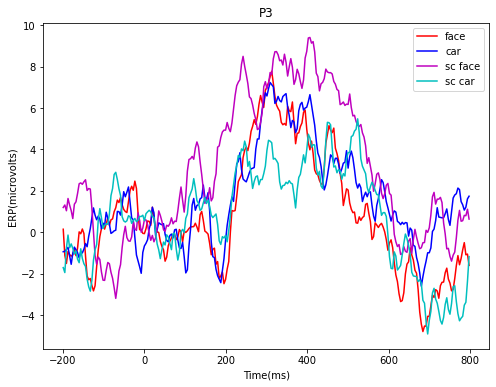

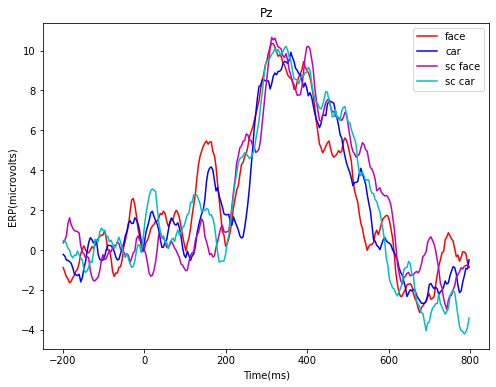

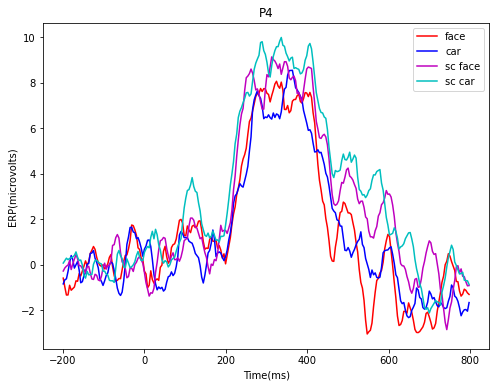

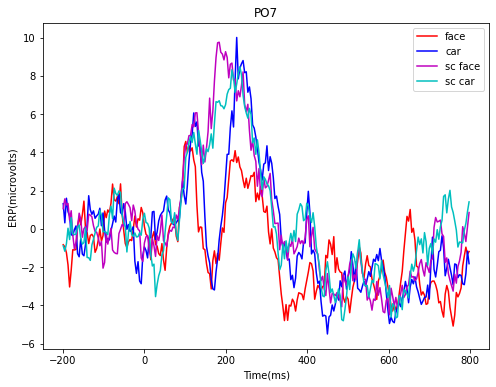

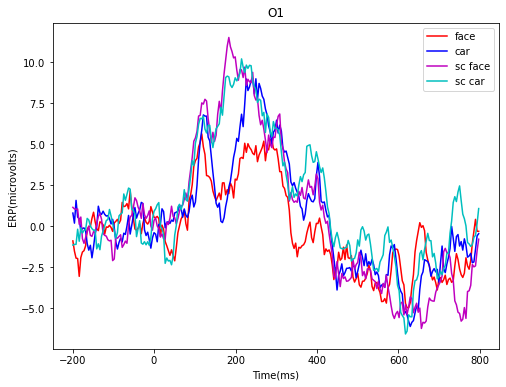

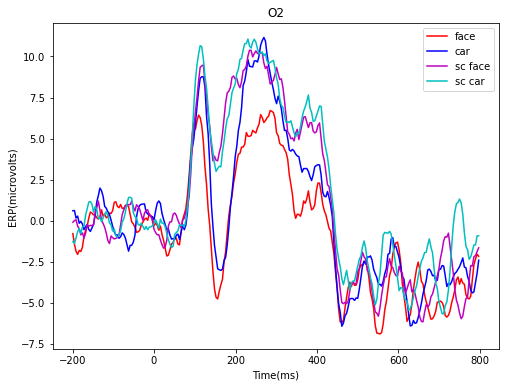

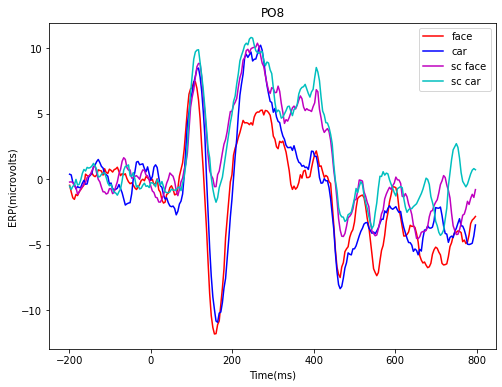

In [101]:
elec = [6,12,23,8,10,27,25]  #P3, Pz, P4, PO7, O1, O2, PO8
for j in elec: 
    plt.figure(figsize = (8,6))
    plt.plot(eeg_time, erp_face[j,:],'r')
    plt.plot(eeg_time, erp_car[j,:],'b')
    plt.plot(eeg_time, erp_sc_face[j,:],'m')
    plt.plot(eeg_time, erp_sc_car[j,:],'c')
    plt.xlabel('Time(ms)')
    plt.ylabel('ERP(microvolts)')
    plt.title(channelnames[j])
    plt.legend(('face','car','sc face','sc car'))
    plt.show()


#### Apply filters and extract the P300/CPP amplitude and latency (timing of the peak after stimulus presentation) at electrode Pz. 

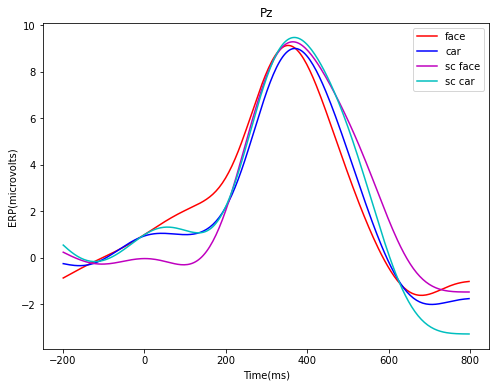

In [102]:
from eeg import makefilter
fp = 4
fs = 8
b,a,w,h = makefilter(samplingrate,fp,fs) # the parameters b and a contain the filter information.
erpfilt_face = signal.filtfilt(b,a,erp_face,axis=1)  #this applies the filter defined by b,a to the erp at every channel 
erpfilt_car = signal.filtfilt(b,a,erp_car,axis=1)  #this applies the filter defined by b,a to the erp at every channel 
erpfilt_sc_face = signal.filtfilt(b,a,erp_sc_face,axis=1)  #this applies the filter defined by b,a to the erp at every channel 
erpfilt_sc_car = signal.filtfilt(b,a,erp_sc_car,axis=1)  #this applies the filter defined by b,a to the erp at every channel 
#note that Pz is electrode 12 
plt.figure(figsize = (8,6))
plt.plot(eeg_time, erpfilt_face[12,:],'r')
plt.plot(eeg_time, erpfilt_car[12,:],'b')
plt.plot(eeg_time, erpfilt_sc_face[12,:],'m')
plt.plot(eeg_time, erpfilt_sc_car[12,:],'c')
plt.xlabel('Time(ms)')
plt.ylabel('ERP(microvolts)')
plt.title(channelnames[12])
plt.legend(('face','car','sc face','sc car'))
plt.show()

In [103]:
face_P3_voltage = np.max(erpfilt_face[12,:])
face_P3_latency = eeg_time[np.argmax(erpfilt_face[12,:])]
car_P3_voltage = np.max(erpfilt_car[12,:])
car_P3_latency = eeg_time[np.argmax(erpfilt_car[12,:])]
sc_face_P3_voltage = np.max(erpfilt_car[12,:])
sc_face_P3_latency = eeg_time[np.argmax(erpfilt_sc_face[12,:])]
sc_car_P3_voltage = np.max(erpfilt_car[12,:])
sc_car_P3_latency = eeg_time[np.argmax(erpfilt_sc_car[12,:])]

In [104]:
print('face:')
print(str(face_P3_voltage)  + ' microvolts at ' + str(face_P3_latency) + ' ms')
print('car:')
print(str(car_P3_voltage)  + ' microvolts at ' + str(car_P3_latency) + ' ms')
print('scrambled face:')
print(str(sc_face_P3_voltage)  + ' microvolts at ' + str(sc_face_P3_latency) + ' ms')
print('scrambled car:')
print(str(sc_car_P3_voltage)  + ' microvolts at ' + str(sc_car_P3_latency) + ' ms')


face:
9.128165550058066 microvolts at 351.5625 ms
car:
8.998198581523898 microvolts at 371.09375 ms
scrambled face:
8.998198581523898 microvolts at 363.28125 ms
scrambled car:
8.998198581523898 microvolts at 351.5625 ms


#### Apply filters and extract the N170 amplitude and latency (timing) at one of PO7,PO8 for the face and car stimuli.  Select the electrode that has the clearest N170 for all 3 participants data.   Alternatively, you could collapse the 2 electrodes data by averaging them together. For the scrambled face and scrambled car stimuli, use the latency of the face and car stimuli, and extract the voltage of the corresponding scrambled stimulus response. 

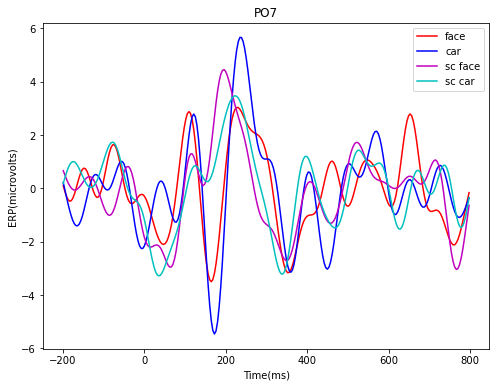

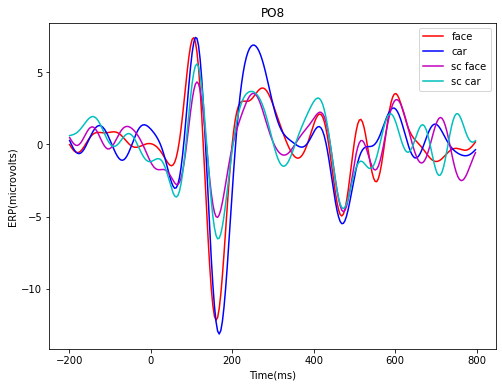

In [105]:
blow,alow,w,h = makefilter(256,15,20) #lowpass filter with the a cutoff of 20 Hz and stop at 25 Hz 
erpfilt_face = signal.filtfilt(blow,alow,erp_face,axis=1)
erpfilt_car = signal.filtfilt(blow,alow,erp_car,axis=1)
erpfilt_sc_face = signal.filtfilt(blow,alow,erp_sc_face,axis=1)
erpfilt_sc_car = signal.filtfilt(blow,alow,erp_sc_car,axis=1)
bhigh,ahigh,w,h = makefilter(256,2,1) #highpass filter with the a cutoff of 3 Hz and stop at 2 Hz
#this was the main change with respect to the simulation in class.  I had to remove more low frequency signals to be able 
# to identify a peak around 170 ms in each subject.   
erpfilt_face = signal.filtfilt(bhigh,ahigh,erpfilt_face,axis=1)
erpfilt_car = signal.filtfilt(bhigh,ahigh,erpfilt_car,axis=1)
erpfilt_sc_face = signal.filtfilt(bhigh,ahigh,erpfilt_sc_face,axis=1)
erpfilt_sc_car = signal.filtfilt(bhigh,ahigh,erpfilt_sc_car,axis=1)

elec = [8,25]  #PO7, PO8
for j in elec: 
    plt.figure(figsize = (8,6))
    plt.plot(eeg_time, erpfilt_face[j,:],'r')
    plt.plot(eeg_time, erpfilt_car[j,:],'b')
    plt.plot(eeg_time, erpfilt_sc_face[j,:],'m')
    plt.plot(eeg_time, erpfilt_sc_car[j,:],'c')
    plt.xlabel('Time(ms)')
    plt.ylabel('ERP(microvolts)')
    plt.title(channelnames[j])
    plt.legend(('face','car','sc face','sc car'))
    plt.show()

### At this point, what I did was rerun the script upto this point in different subjects. And while its really easy and obvious to pick out a P300 peak in every subject at Pz, its not as easy to pick out the N170 peak.  So, one thing I did to improve the performance of the algorithm was to limit the time winodw it looks for the minimum (N170) to upto to 200 ms after the stimulus onset.  In eeg_time, this corresponded to index 102 
### I also chose P08 as having the most clear response 

In [118]:
face_N170_voltage = np.min(erpfilt_face[25,:])
face_N170_latency = eeg_time[np.argmin(erpfilt_face[25,:])]
car_N170_voltage = np.min(erpfilt_car[25,:])
car_N170_latency = eeg_time[np.argmin(erpfilt_car[25,:])]
sc_face_N170_voltage = erpfilt_sc_face[25,np.argmin(erpfilt_face[25,:])]
sc_car_N170_voltage = erpfilt_sc_car[25,np.argmin(erpfilt_face[25,:])]
print('face:')
print(str(face_N170_voltage)  + ' microvolts at ' + str(face_N170_latency) + ' ms')
print('car:')
print(str(car_N170_voltage)  + ' microvolts at ' + str(car_N170_latency) + ' ms')
print('scrambled face:')
print(str(sc_face_N170_voltage)  + ' microvolts at ' + str(face_N170_latency) + ' ms')
print('scrambled car:')
print(str(sc_car_N170_voltage)  + ' microvolts at ' + str(car_N170_latency) + ' ms')


face:
-12.186995795120888 microvolts at 160.15625 ms
car:
-13.140173616263517 microvolts at 167.96875 ms
scrambled face:
-5.006840953397255 microvolts at 160.15625 ms
scrambled car:
-6.308030190664201 microvolts at 167.96875 ms
